In [1]:
import pandas as pd
import requests
import sqlite3

In [10]:
def get_listings():
    """Returns a list of all listings."""
    # Connect to the database.
    db = sqlite3.connect("db/listings.db")
    cursor = db.cursor()

    # Get all listings from the database.
    cursor.execute("SELECT * FROM listings")

    # Create a list of all listings.
    listings = []
    for row in cursor.fetchall():
        listings.append(row)

    # Close the connection to the database.
    db.close()

    # Return the list of listings.
    return listings

items = get_listings()

In [17]:
df = pd.DataFrame(items, columns=["id", "title","price", "link"])
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price"]]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18990 entries, 0 to 18989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   18990 non-null  object
 1   price   18990 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 296.8+ KB


In [19]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [20]:
make = "Toyota"
tdf = df[df["title"].str.contains(make, case=False)]

In [21]:
tdf

,title,price
7369,"2022 Toyota Tundra Limited, Twin Turbo V6, 4X4...",59995
7286,"2022 Toyota Tundra Limited, Twin Turbo V6, 4X4...",59995
7258,"2022 Toyota Tundra Limited, Twin Turbo V6, 4X4...",59995
7367,"2022 Toyota Tundra Limited, Twin Turbo V6, 4X4...",59995
7304,"2022 Toyota Tundra Limited, Twin Turbo V6, 4X4...",59995
...,...,...
2749,02 Toyota Camry and other vehicles for finance...,1000
2748,02 Toyota Camry and other vehicles for finance...,1000
2750,02 Toyota Camry and other vehicles for finance...,1000
2751,02 Toyota Camry and other vehicles for finance...,1000


<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 7369 to 2752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1365 non-null   object
 1   price   1365 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.0+ KB


<Axes: ylabel='Frequency'>

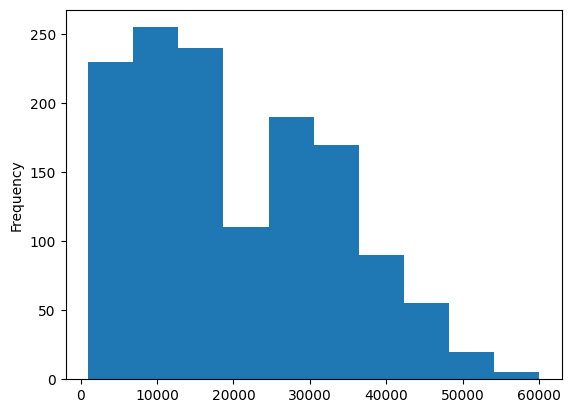

In [22]:
tdf = tdf[tdf["price"] <= 100000]
tdf.info()
tdf["price"].plot(kind="hist",bins=10)